In [1]:
import itertools
from torch_geometric.utils import get_laplacian, to_scipy_sparse_matrix
from scipy.sparse.linalg import eigsh
from torch_geometric.datasets import Planetoid

from matplotlib import pyplot as plt
import numpy as np

In [2]:
dataset = Planetoid('./data', 'cora')
graph = dataset[0]

In [ ]:
laplacian = get_laplacian(graph.edge_index)
indices = laplacian[0]
attributes = laplacian[1]
laplacian_matrix = to_scipy_sparse_matrix(indices, attributes)
eigenvalues, eigenvectors = eigsh(A=laplacian_matrix, k=2707, which='LA')

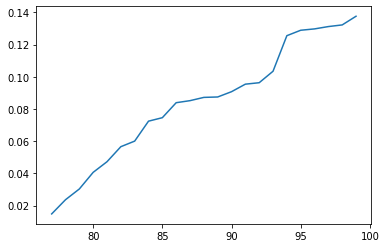

In [3]:
start, end = 77, 100
x = np.arange(start, end)
y = eigenvalues[start:end]
plt.plot(x,y)

*******************************************
****************** IDX=1250 ******************
*******************************************


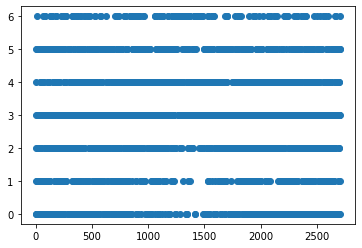

*******************************************
****************** IDX=1251 ******************
*******************************************


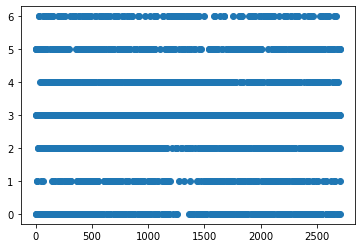

*******************************************
****************** IDX=1252 ******************
*******************************************


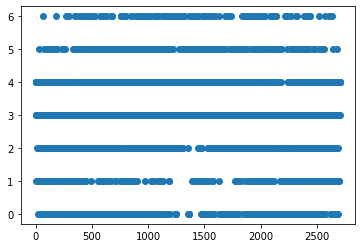

*******************************************
****************** IDX=1253 ******************
*******************************************


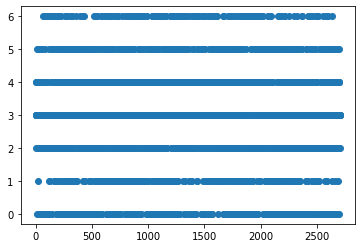

*******************************************
****************** IDX=1254 ******************
*******************************************


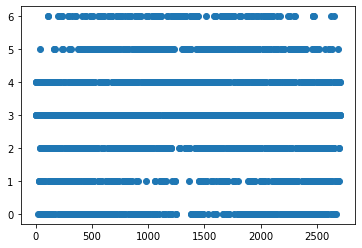

In [63]:
for idx in range(1250,1255):
    print("*******************************************")
    print(f'****************** IDX={idx} ******************')
    print("*******************************************")
    vec = eigenvectors[:, idx]
    perm = np.argsort(vec)
    plt.figure()
    plt.scatter(np.arange(len(perm)), graph.y[perm])
    plt.show()

In [180]:
true_perm = np.argsort(graph.y)
max_acc = 0
for idx in range(2707):
    vec = eigenvectors[:, idx]
    perm = np.argsort(vec)
    perm_acc = (graph.y[perm] == graph.y[true_perm]).sum().item()/2078
    if perm_acc > max_acc:
        max_acc = perm_acc
        max_perm = perm
        my_idx = idx

print(f"max_acc={max_acc}")
print(f"my_idx={my_idx}")

max_acc=0.38787295476419636
my_idx=2663


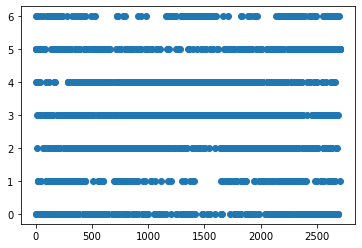

In [181]:
vec = eigenvectors[:, 2663]
perm = np.argsort(vec)
plt.figure()
plt.scatter(np.arange(len(perm)), graph.y[perm])
plt.show()


In [14]:
acc_list = np.array([41.8, 44.0, 43.3, 38.800000000000004, 40.8, 43.0, 41.9, 40.5, 44.3, 41.199999999999996, 41.0, 42.9, 39.7, 40.0, 41.5, 39.6, 40.0, 39.900000000000006, 38.0, 41.9, 37.5, 41.9, 35.3, 43.3, 39.7, 40.5, 42.699999999999996, 40.300000000000004, 38.4, 48.0, 43.2, 42.0, 41.0, 39.2, 44.1, 41.6, 41.4, 39.6, 41.099999999999994, 38.4, 35.4, 42.0, 42.5, 36.3, 41.3, 35.5, 39.6, 41.3, 39.300000000000004, 43.9, 36.1, 41.099999999999994, 40.6, 44.3, 37.8, 41.4, 38.0, 42.199999999999996, 36.3, 44.6, 43.2, 41.699999999999996, 42.6, 42.6, 41.699999999999996, 39.900000000000006, 40.699999999999996, 44.3, 40.8, 41.699999999999996, 41.8, 37.7, 40.2, 44.6, 39.300000000000004, 43.5, 38.2, 48.4, 47.599999999999994, 51.1, 51.1, 47.9, 55.50000000000001, 51.5, 52.1, 52.300000000000004, 53.1, 55.300000000000004, 46.800000000000004, 51.4, 48.3, 45.800000000000004, 50.5, 47.4, 48.5, 46.800000000000004, 48.0, 42.8, 48.4, 48.5, 46.9, 39.5, 45.0, 46.800000000000004, 50.6, 46.6, 45.2, 42.9, 46.2, 43.9, 44.6, 45.6, 45.2, 42.699999999999996, 45.5, 46.400000000000006, 45.4, 47.0, 45.6, 37.9, 47.9, 42.9, 44.1, 42.3, 43.2, 44.0, 45.1, 45.5, 47.099999999999994, 41.5, 40.5, 41.9, 42.4, 42.3, 40.9, 39.800000000000004, 39.300000000000004, 43.5, 40.400000000000006, 42.199999999999996, 42.5, 42.199999999999996, 43.7, 42.9, 43.3, 41.9, 47.699999999999996, 41.199999999999996, 43.2, 42.9, 46.5, 39.300000000000004, 44.3, 46.7, 40.5, 38.7, 43.3, 43.1, 42.1, 40.6, 45.0, 40.300000000000004, 40.0, 44.4, 41.3, 41.199999999999996, 44.4, 40.6, 40.5, 45.1, 44.3, 45.800000000000004, 42.3, 43.1, 42.0, 43.8, 45.2, 42.4, 40.400000000000006, 41.5, 39.6, 44.1, 38.6, 40.300000000000004, 41.699999999999996, 43.4, 40.6, 43.3, 38.2, 42.0, 42.1, 44.2, 44.3, 40.5, 38.2, 41.6, 41.6, 42.699999999999996, 42.699999999999996, 44.800000000000004])

In [183]:
import numpy as np

In [206]:
np.mean(acc_list)

42.937000000000005

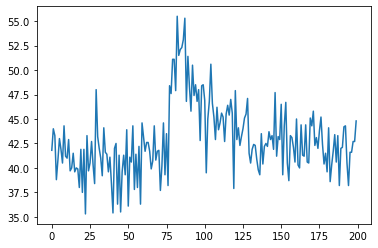

In [208]:
start, end = 0, 200
plt.plot(np.arange(start, end), acc_list[start:end])

In [6]:
import os

In [7]:
os.chdir('/localdisks/natika/Pycharm/seriation-gnn-transformer/')

In [223]:
os.getcwd()

'/localdisks/natika/Pycharm/seriation-gnn-transformer'

In [4]:
import torch

In [8]:
eigenvectors = torch.load('eigenvectors.pt')

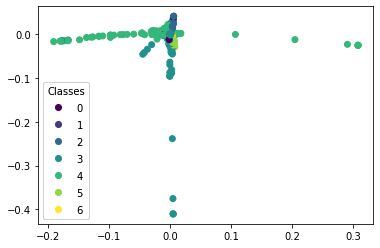

In [19]:
labels = graph.y.numpy().reshape(-1)
vec1 = eigenvectors[:, 82]
vec2 = eigenvectors[:, 87]
fig, ax = plt.subplots()
scatter = ax.scatter(vec1, vec2, c=labels)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()

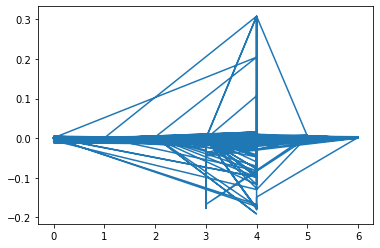